## Resample Time Series Data

Given is the dataset `alarms.csv` which contains raw events of three different error messages of a machine.

In [1]:
import pandas as pd

# Read dataset
errors = pd.read_csv("../resources/errors.csv")
errors.head()

,ts,event
0,2020-01-01 00:00:02,error C
1,2020-01-01 00:01:26,error A
2,2020-01-01 00:02:41,error A
3,2020-01-01 00:04:45,error C
4,2020-01-01 00:05:10,error C


Your task is to count the number of events in 15 minute intervals.

In [2]:
# Convert timestamps to datetime
errors.ts = pd.to_datetime(errors.ts)

# Aggregate errors on error type and 15 minute interval
errors_agg = (
    errors
    .assign(count=1) # this is a helper column for counting
    .groupby(['event'])
    .apply(
        lambda df: (
            df
            .assign(count=1)
            .resample(rule='15min', on='ts')
            .agg({'count': 'sum'})
        )
    )
    .reset_index()
    [['ts', 'event', 'count']]
)
errors_agg.head()

,ts,event,count
0,2020-01-01 00:00:00,error A,6
1,2020-01-01 00:15:00,error A,2
2,2020-01-01 00:30:00,error A,2
3,2020-01-01 00:45:00,error A,2
4,2020-01-01 01:00:00,error A,3


Afterwards, the time series are to be visualized in separate charts.

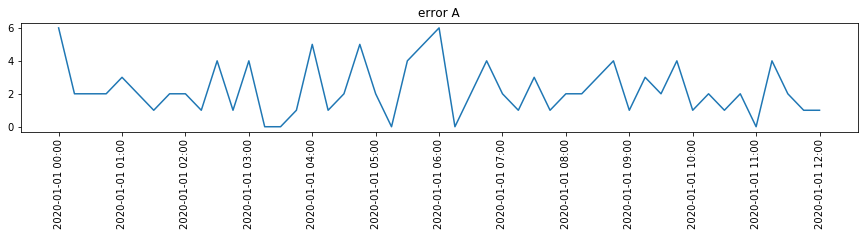

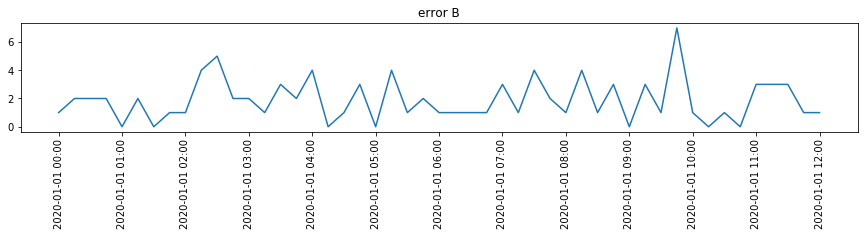

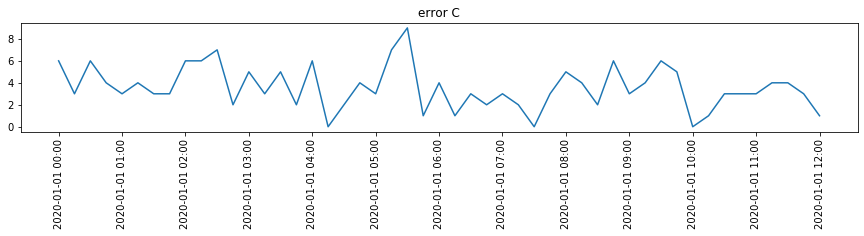

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Loop through error types
for event in errors_agg.event.unique():
    
    # Filter dataframe to error type
    tmp = errors_agg[errors_agg.event==event]
    
    # Create and show plot
    fig = plt.figure(figsize = (15, 2))
    ax = fig.add_subplot(111)
    ax.set_title(event)
    ax.plot(tmp.ts, tmp['count'])
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))
    plt.xticks(rotation=90)
    plt.show()